## Working with image data in `Mosaic`

In [1]:
from mosaic import DataPanel, ImageColumn

## 💾 Download the data.
First, we'll download some data to explore. We're going to use the [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), a dataset of over 200k celebrity portraits, each annotated for 40 different attributes (e.g. "smiling", "bangs", "mustache").
- Download time: ~3 minutes
- Download size: 3.1G

In addition to downloading the data, `download_celeba` prepares a CSV, "celeba.csv", with a row for each image. 

In [2]:
from mosaic.contrib.celeba import download_celeba

DATASET_DIR = "/home/common/datasets/celeba"
download_celeba(DATASET_DIR)

## 📸 Create an image `DataPanel`

We're going to build a `DataPanel` out of "celeba.csv" file from the download above. 

1. Create a `DataPanel` from a CSV using the `DataPanel.from_csv` class method.
2. Create an `ImageColumn` from the the existing `"img_path"` column using the `DataPanel.from_filepaths` class method and add it to the the `DataPanel`. 

In [10]:
# 1. Create `DataPanel`
dp = DataPanel.from_csv(os.path.join(DATASET_DIR, "celeba.csv"))
# 2. Create `ImageColumn`
dp["img"] = ImageColumn.from_filepaths(filepaths=dp["img_path"])

When we create an `ImageColumn` we don't load the images into memory. Instead, `ImageColumn` maintains all of those filepaths we passed in and only loads them when they are accessed. 


Indexing the `ImageColumn` returns an object of type: <class 'PIL.Image.Image'>.


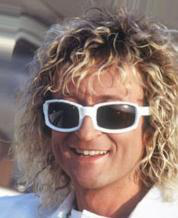

In [30]:
img = dp["img"][16]
print(f"Indexing the `ImageColumn` returns an object of type: {type(img)}.")
display(img)

### 🧫 _Aside_: `ImageColumn` under the hood, `CellColumn`.

If you check out the implementation of `ImageColumn` (at "mosaic/columns/image_column.py"), you'll notice that it's a super simple subclass of `CellColumn`. 

_What's a `CellColumn`?_
In `mosaic`, high-dimensional data types like images and videos are typically stored in a `CellColumn`. The advantage of using `CellColumn` (or one of its subclasses) is that we can easily create new column types (e.g. for medical volumes, SpacyDocs, or graphs) without dealingb with the implementation complexity of a full column. Instead, we can think in terms of the individual elements in the column: the cells.  We implement a cell by subclassing `AbstractCell` 

```
from mosaic.cells.abstract import AbstractCell
folder = LazyLoader("torchvision.datasets.folder")

class ExampleImageCell(AbstractCell):

    def __init__(self, filepath: str):
        super(ImagePath, self).__init__()

    def get(self, *args, **kwargs):
        image = folder.default_loader(self.filepath)
        return image

    @classmethod
    def _state_keys(cls) -> Collection:
        return {"filepath"}
```

### Lazy indexing.
To access the underlying cell (wihtout loading the image), use the lazy indexer, `lz`. 

In [33]:
cell = dp["img"].lz[14]
print(f"Lazy indexing the `ImageColumn` returns an object of type: {type(cell)}.")
display(cell)

Lazy indexing the `ImageColumn` returns an object of type: <class 'mosaic.cells.imagepath.ImagePath'>.


Image(144991.jpg)

### Lazy loading